In [42]:
library(Seurat)
library(ggplot2)
library(Matrix)
library(viridis)

Loading required package: viridisLite



In [4]:
gem_data <- as.data.frame(data.table::fread("data/Mouse1_T186.gem.gz"))

In [19]:
source('R_function/ST_preprocess.R')
obj <- gem2obj(gem_data,geneID='gene',MIDCounts='umi_count',bin=50)

In [20]:
obj

An object of class Seurat 
22857 features across 24677 samples within 1 assay 
Active assay: RNA (22857 features, 0 variable features)
 2 layers present: counts, data

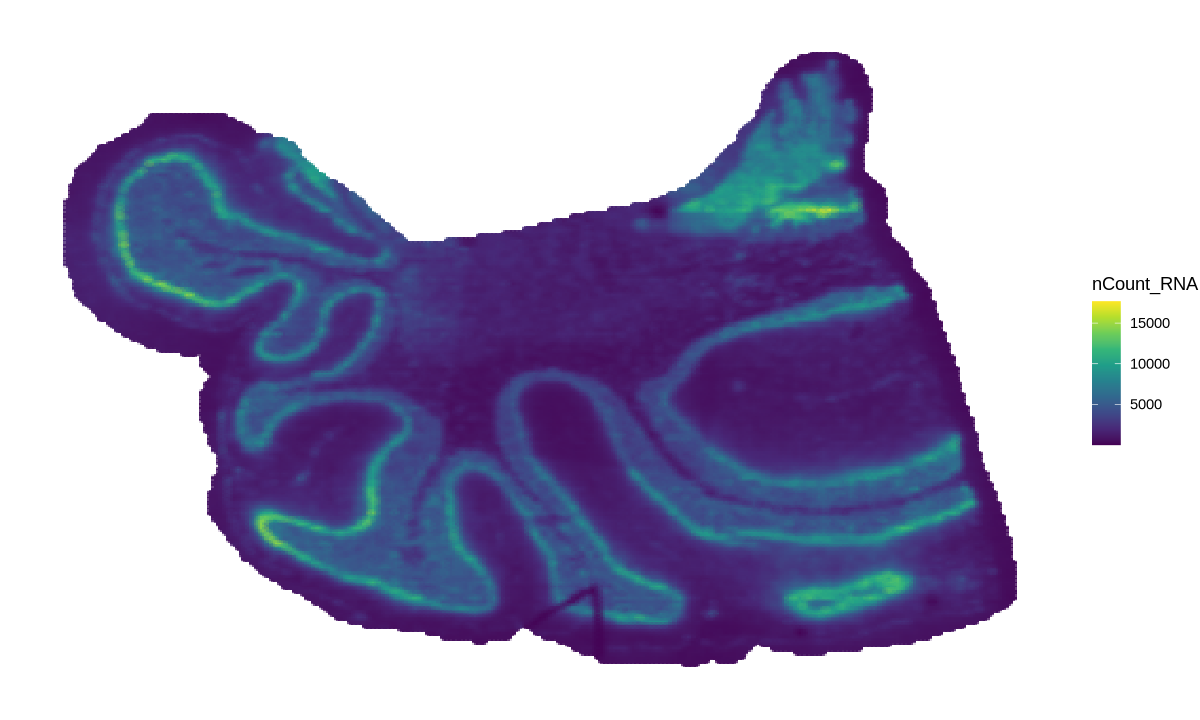

In [44]:
source('R_function/ST_plot.R')
options(repr.plot.width=10,repr.plot.height=6)
plot_spatial_col(obj@meta.data,col_name = 'nCount_RNA',color=viridis::viridis(10))

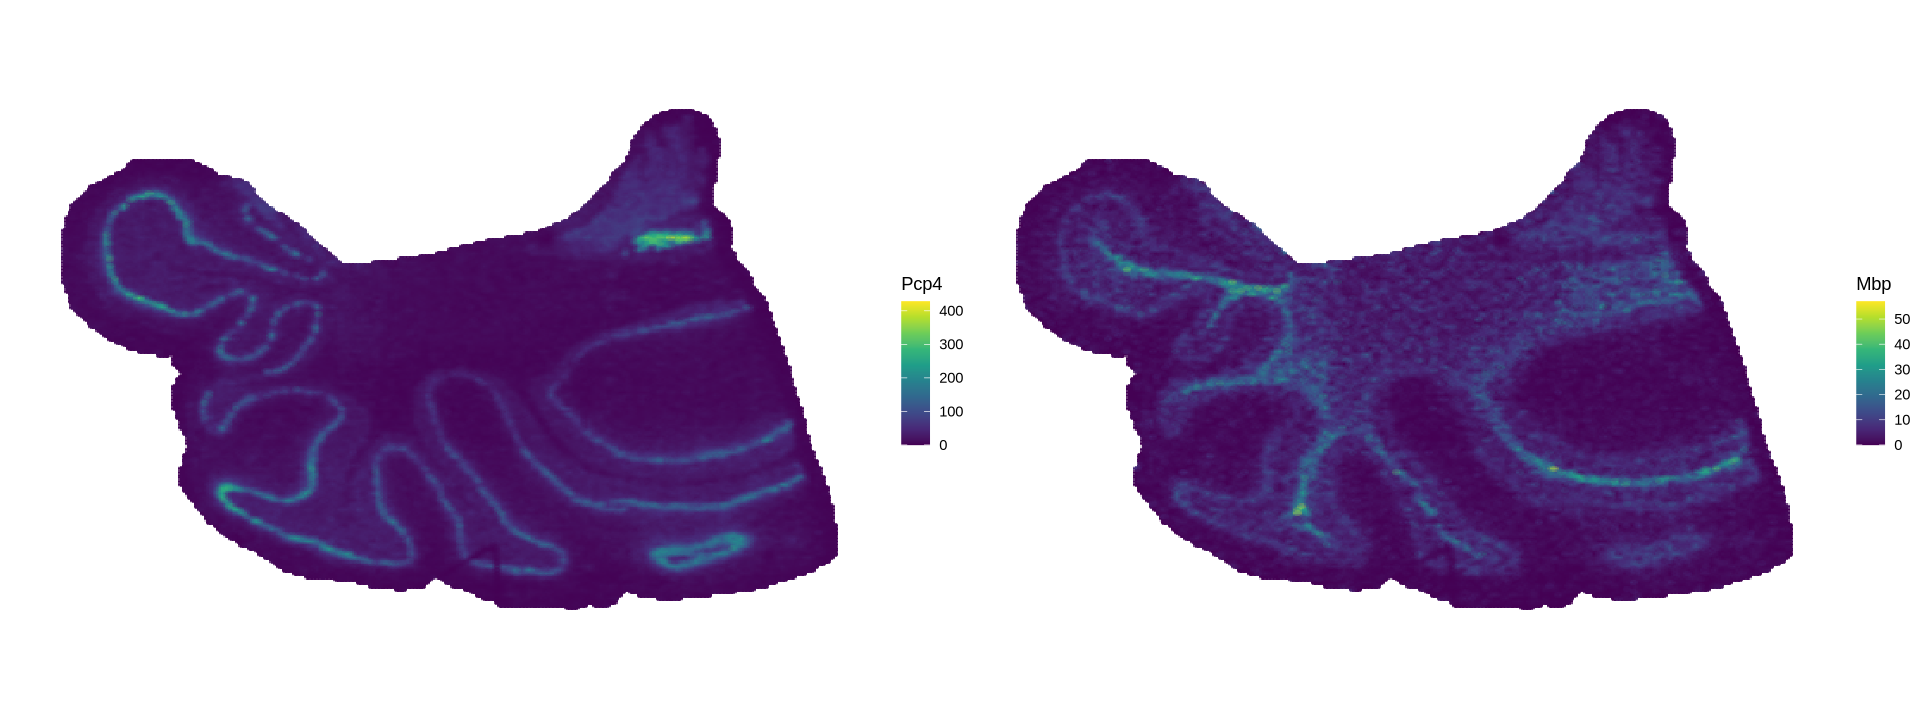

In [45]:
source('R_function/ST_plot.R')
options(repr.plot.width=16,repr.plot.height=6)
plot_spatial_feature(obj,features = c('Pcp4','Mbp'),color=viridis::viridis(10))

In [46]:
saveRDS(obj,'Mouse_cerebellum.rds')

In [51]:
obj <- NormalizeData(obj,scale.factor = 1e4)
obj <- FindVariableFeatures(obj,nfeatures = 2000)
obj <- ScaleData(obj, verbose = FALSE)
obj <- RunPCA(obj,npcs=30,verbose = FALSE)
obj <- FindNeighbors(obj,reduction = 'pca',k.param = 15,dims=1:30,verbose = FALSE)
obj <- FindClusters(obj,resolution=0.8,verbose = FALSE)
obj <- RunUMAP(obj,reduction = 'pca',dims=1:10,verbose = FALSE)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


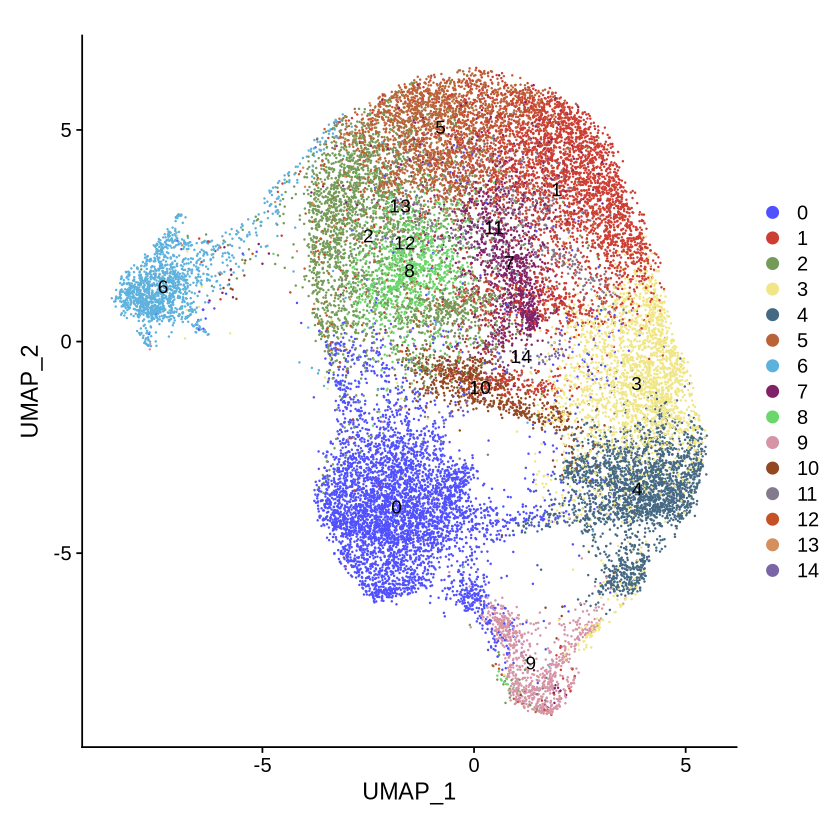

In [57]:
options(repr.plot.width=7,repr.plot.height=7)
DimPlot(obj,reduction='umap',label=T)+
scale_color_manual(values = ggsci::pal_igv()(20))+
coord_fixed()

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


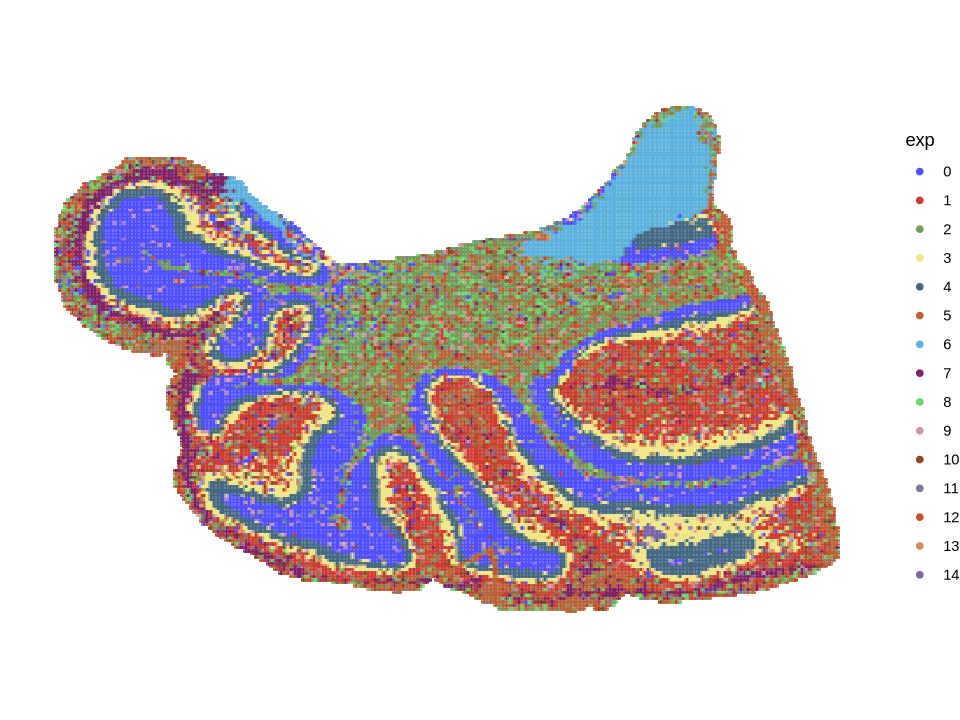

In [66]:
source('R_function/ST_plot.R')
options(repr.plot.width=8,repr.plot.height=6)
plot_spatial_col(obj@meta.data,col_name = 'seurat_clusters',size=2)+
scale_color_manual(values = ggsci::pal_igv()(20))+
coord_fixed()

In [67]:
saveRDS(obj,'Mouse_cerebellum.cluster.rds')

In [188]:
obj <- readRDS('Mouse_cerebellum.cluster.rds')

In [189]:
source('R_function/knn_function.R')
options(repr.plot.width=16,repr.plot.height=6)
obj <- smooth_obj_data(obj,smooth_function='spatial2',compute='gauss')

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 4.2 GiB”


In [137]:
as.matrix(head(obj@assays$RNA@data))

,16_109,16_128,27_118,34_132,36_95,39_103,40_98,40_91,44_73,44_110,⋯,126_17,121_14,138_5,138_11,137_7,137_19,138_10,124_16,190_11,138_6
0610005C13Rik,0.898980,1.380972,1.7881582,1.124350,2.5013855,1.881565,1.8732678,3.3629959,3.0474177,1.522553,⋯,0.00000000,0.04854143,0.0000000000,0.000000,0.000000000,0.0000000,0.0000000,0.00000000,0.000000,0.00000000
0610006L08Rik,0.000000,0.000000,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.000000,⋯,0.00000000,0.00000000,0.0000000000,0.000000,0.000000000,0.0000000,0.0000000,0.00000000,0.000000,0.00000000
0610009B22Rik,5.343301,1.291523,2.9738858,4.544887,7.0952942,0.113399,3.8959779,5.9845168,0.2162091,3.465652,⋯,0.09597552,2.34188796,0.0059437881,0.000000,0.000000000,0.8615595,0.0000000,0.00000000,0.000000,0.01615689
0610009O20Rik,1.661539,1.855712,1.3430157,1.612023,0.3810296,0.000000,1.5906199,0.0000000,0.0000000,1.522553,⋯,0.19613820,0.00000000,0.0000000000,0.000000,0.000000000,0.0000000,0.0000000,0.33873467,0.000000,0.00000000
0610010F05Rik,1.167316,1.506808,0.2788496,2.479437,0.3169852,0.000000,0.1127246,0.1829077,0.0000000,1.962745,⋯,0.99151779,0.00000000,0.0000000000,0.000000,0.008514403,0.0000000,0.0000000,0.03516539,0.000000,0.00000000
0610010K14Rik,4.975342,3.075637,9.7317790,5.320564,4.7632343,1.388006,2.6472767,0.2298241,7.6145452,3.142183,⋯,0.18371917,0.00000000,0.0003551723,1.479093,1.619723523,1.9991301,0.3266156,0.00000000,1.962363,0.05455165


In [190]:
obj <- ScaleData(obj, verbose = FALSE)
obj <- RunPCA(obj,npcs=30,verbose = FALSE)
obj <- FindNeighbors(obj,reduction = 'pca',k.param = 15,dims=1:30,verbose = FALSE)
obj <- FindClusters(obj,resolution=0.8,verbose = FALSE)
obj <- RunUMAP(obj,reduction = 'pca',dims=1:10,verbose = FALSE)

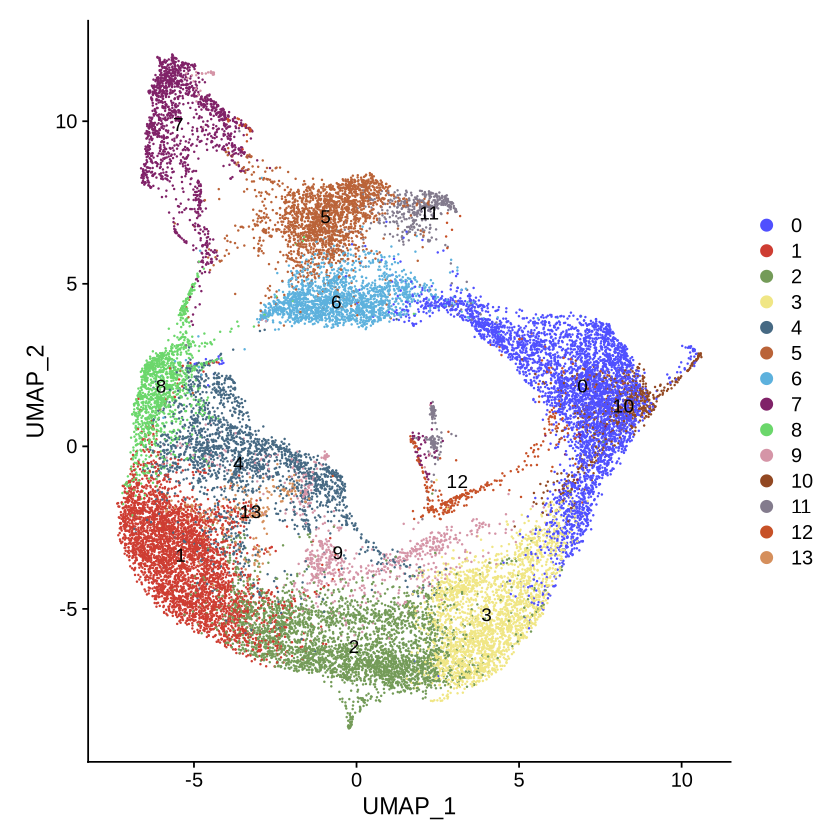

In [191]:
options(repr.plot.width=7,repr.plot.height=7)
DimPlot(obj,reduction='umap',label=T)+
scale_color_manual(values = ggsci::pal_igv()(50))+
coord_fixed()

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


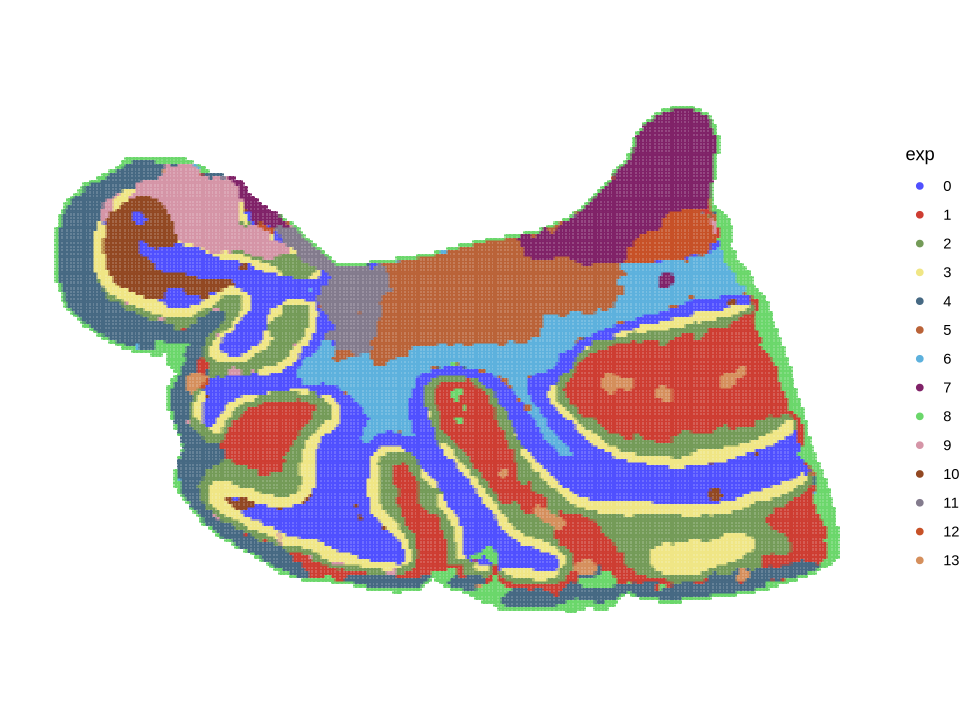

In [192]:
source('R_function/ST_plot.R')
options(repr.plot.width=8,repr.plot.height=6)
plot_spatial_col(obj@meta.data,col_name = 'seurat_clusters',size=2)+
scale_color_manual(values = ggsci::pal_igv()(50))+
coord_fixed()

In [194]:
library(EBImage)
read_tif <- function(image_path){
    image <- readImage(image_path,)
    image_df <- reshape2::melt(image)
    colnames(image_df) <- c('x','y','mask')
    image_df$mask <- image_df$mask*255
    return(image_df)}
mask <- read_tif('Layer_Mask.tif')
rownames(mask) <- paste0(mask$x,'_',mask$y)
head(mask)

,x,y,mask
,<int>,<int>,<dbl>
1_1,1,1,0
2_1,2,1,0
3_1,3,1,0
4_1,4,1,0
5_1,5,1,0
6_1,6,1,0


In [195]:
obj@meta.data$mask <- mask[rownames(obj@meta.data),'mask']
head(obj@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,x,y,region,RNA_snn_res.0.8,seurat_clusters,mask
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<list>,<fct>,<fct>,<dbl>
16_109,SeuratProject,13422,4033,16,109,,3,3,150
16_128,SeuratProject,7396,2682,16,128,,9,9,200
27_118,SeuratProject,4934,2094,27,118,,0,0,100
34_132,SeuratProject,9936,3334,34,132,,9,9,150
36_95,SeuratProject,5394,2265,36,95,,3,3,200
39_103,SeuratProject,4531,2006,39,103,,0,0,50


In [196]:
obj@meta.data$anatomy <- c('0'='Background','50'='Granlar Layer','100'='White Matter',
     '150'='Purkinje Layer','200'='Molecular Layer')[ as.character(obj@meta.data$mask)]
head(obj@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,x,y,region,RNA_snn_res.0.8,seurat_clusters,mask,anatomy
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<list>,<fct>,<fct>,<dbl>,<chr>
16_109,SeuratProject,13422,4033,16,109,,3,3,150,Purkinje Layer
16_128,SeuratProject,7396,2682,16,128,,9,9,200,Molecular Layer
27_118,SeuratProject,4934,2094,27,118,,0,0,100,White Matter
34_132,SeuratProject,9936,3334,34,132,,9,9,150,Purkinje Layer
36_95,SeuratProject,5394,2265,36,95,,3,3,200,Molecular Layer
39_103,SeuratProject,4531,2006,39,103,,0,0,50,Granlar Layer


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


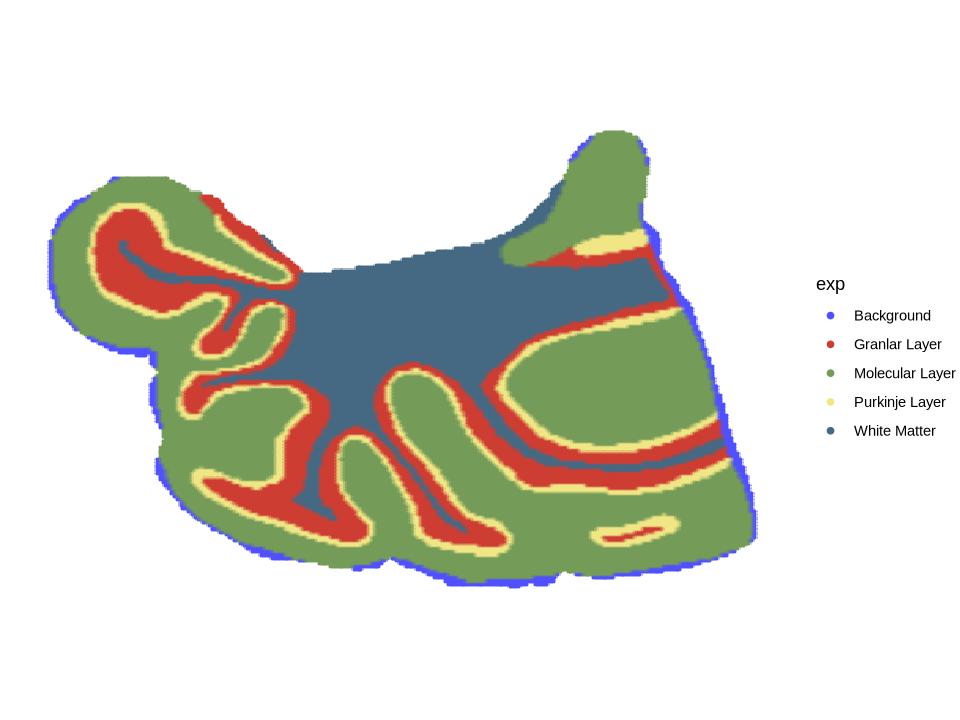

In [180]:
source('R_function/ST_plot.R')
options(repr.plot.width=8,repr.plot.height=6)
plot_spatial_col(obj@meta.data,col_name = 'anatomy',size=2.5)+
scale_color_manual(values = ggsci::pal_igv()(50))+
coord_fixed()

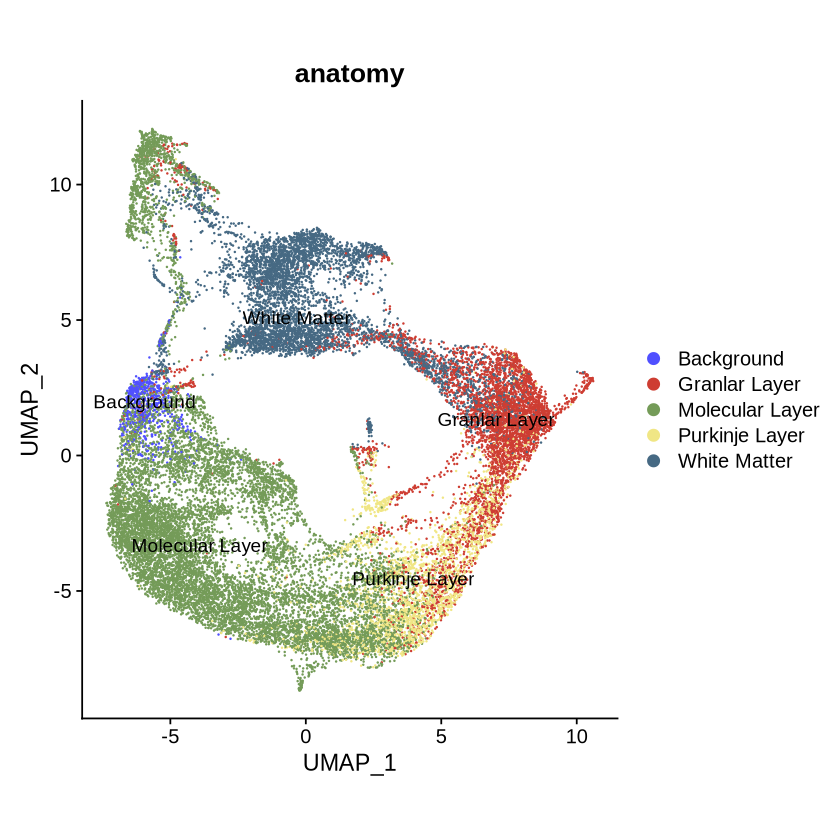

In [197]:
options(repr.plot.width=7,repr.plot.height=7)
DimPlot(obj,reduction='umap',group.by = 'anatomy',label=T)+
scale_color_manual(values = ggsci::pal_igv()(50))+
coord_fixed()

In [173]:
Border <- read.csv('layer_border.txt',sep='\t')
colnames(Border) <- c('X','Y','line_id')
Border <- lapply(unique(Border$line_id),function(line){
tmp <- Border[Border$line_id==line,]
tmp1 <- tmp[1:(nrow(tmp)-1),c('X','Y')]
tmp1[,c('X1','Y1')] <- tmp[2:nrow(tmp),c('X','Y')]
return(tmp1)
})
Border <- dplyr::bind_rows(Border)

In [174]:
head(Border)

,X,Y,X1,Y1
,<dbl>,<dbl>,<dbl>,<dbl>
1,87.888,113.711,87.809,113.773
2,87.809,113.773,87.730,113.834
3,87.730,113.834,87.651,113.896
4,87.651,113.896,87.572,113.958
5,87.572,113.958,87.494,114.019
6,87.494,114.019,87.415,114.081


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


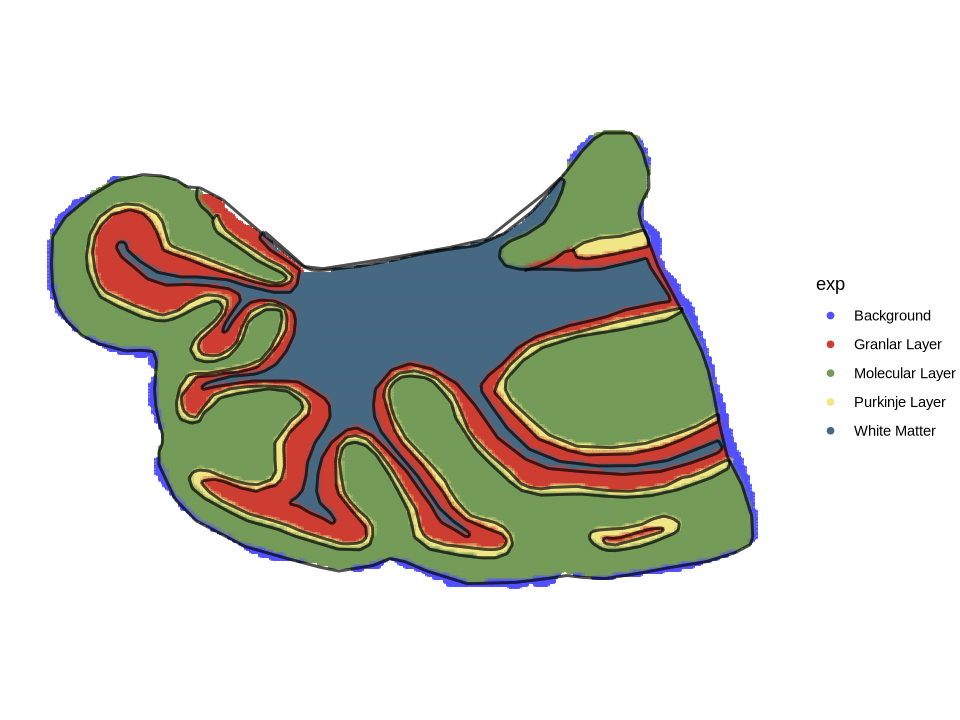

In [178]:
source('R_function/ST_plot.R')
options(repr.plot.width=8,repr.plot.height=6)
plot_spatial_col(obj@meta.data,col_name = 'anatomy',
                 border = T,border_use = Border,size=3)+
scale_color_manual(values = ggsci::pal_igv()(50))+
coord_fixed()

In [ ]:
file_list = pd.read_csv